# Modeling the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
path_to_data_mine = '../../data_mine/'
#file_name = 'resale-flat-prices-based-on-approval-date-1990-1999.csv'
#file_name = 'resale-flat-prices-based-on-approval-date-2000-feb-2012.csv'
#file_name  = 'resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv'
file_name = 'resale-flat-prices-based-on-registration-date-from-jan-2015-onwards.csv'



path_to_file = path_to_data_mine + file_name

df = pd.read_csv(path_to_file, encoding='utf-8')

df . head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


# Encoding block and street names: 
- replace block and street_name with number of times they appear in training data.


In [4]:
block_frq, st_name_frq = df['block'].value_counts(), df['street_name'].value_counts()

## Add these as new columns, and delete original block/street names

In [7]:
df['block_fr'] = block_frq[df['block'].values].values
df['st_name_fr'] = st_name_frq[df['street_name'].values].values

del df['block'], df['street_name']

# Create new feature:
* month of sale (categorical: 01 to 12)
* number of years between lease start and sale: (numerical)

In [8]:
df['years_since_leased'] = np.array([int(dt.split('-')[0]) for dt in df['month'].values]) - df['lease_commence_date'].values
df['month_of_sale'] = np.array([dt.split('-')[1] for dt in df['month'].values])
del df['month'], df['lease_commence_date']

In [9]:
df . head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,block_fr,st_name_fr,years_since_leased,month_of_sale
0,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,70,255000.0,58,436,29,01
1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,65,275000.0,56,826,34,01
2,ANG MO KIO,3 ROOM,01 TO 03,69.0,New Generation,64,285000.0,74,436,35,01
3,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,63,290000.0,61,826,36,01
4,ANG MO KIO,3 ROOM,07 TO 09,68.0,New Generation,64,290000.0,52,826,35,01


# Separate X and y for model fitting

In [10]:
X = df[[col for col in df.columns if col != 'resale_price']]
y = np.log(df['resale_price'])

In [11]:
X.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,block_fr,st_name_fr,years_since_leased,month_of_sale
0,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,70,58,436,29,01
1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,65,56,826,34,01
2,ANG MO KIO,3 ROOM,01 TO 03,69.0,New Generation,64,74,436,35,01
3,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,63,61,826,36,01
4,ANG MO KIO,3 ROOM,07 TO 09,68.0,New Generation,64,52,826,35,01


# One-hot encode categorical features

In [12]:
X.shape
categorical_features = ['town','flat_type','storey_range','flat_model', 'month_of_sale']
for ft in categorical_features:
    print (ft)
    ft_one_hot = pd.get_dummies(X[ft], prefix=ft, prefix_sep=':')
    X = X.join(ft_one_hot)
    del X[ft]
X.shape    

town
flat_type
storey_range
flat_model
month_of_sale


(69767, 88)

In [13]:
X.head()

,floor_area_sqm,remaining_lease,block_fr,st_name_fr,years_since_leased,town:ANG MO KIO,town:BEDOK,town:BISHAN,town:BUKIT BATOK,town:BUKIT MERAH,...,month_of_sale:03,month_of_sale:04,month_of_sale:05,month_of_sale:06,month_of_sale:07,month_of_sale:08,month_of_sale:09,month_of_sale:10,month_of_sale:11,month_of_sale:12
0,60.0,70,58,436,29,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,68.0,65,56,826,34,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.0,64,74,436,35,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,63,61,826,36,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.0,64,52,826,35,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Before training a sales price prediction model, we  normalize numerical features. One-hot encoded columns (0/1 values) are not normalized.

In [14]:
numerical_features = [ft for ft in X.columns if ':' not in ft]
numerical_features

['floor_area_sqm',
 'remaining_lease',
 'block_fr',
 'st_name_fr',
 'years_since_leased']

In [15]:
X[numerical_features].head()

,floor_area_sqm,remaining_lease,block_fr,st_name_fr,years_since_leased
0,60.0,70,58,436,29
1,68.0,65,56,826,34
2,69.0,64,74,436,35
3,68.0,63,61,826,36
4,68.0,64,52,826,35


In [16]:
from sklearn.preprocessing import StandardScaler
tmp = pd.DataFrame( StandardScaler(with_mean=True) . fit_transform(X[numerical_features]),  columns=numerical_features )
tmp.head(10)
X[numerical_features] = tmp
del tmp

In [17]:
X[numerical_features].head()

,floor_area_sqm,remaining_lease,block_fr,st_name_fr,years_since_leased
0,-1.552234,-0.357521,-0.246448,0.746815,0.398153
1,-1.221915,-0.795761,-0.284125,2.521708,0.837738
2,-1.180625,-0.883409,0.054964,0.746815,0.925655
3,-1.221915,-0.971057,-0.189934,2.521708,1.013572
4,-1.221915,-0.883409,-0.359478,2.521708,0.925655


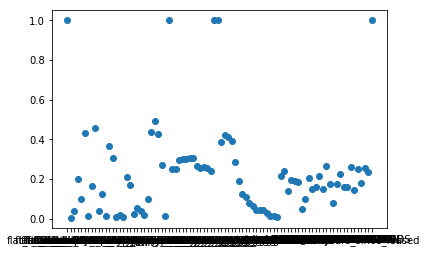

In [18]:
x = plt.plot(X.std(axis=0), 'o')

plt . show()

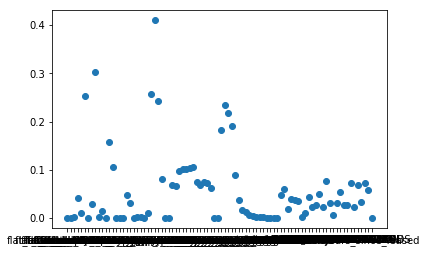

In [19]:
x = plt.plot(X . mean(axis=0), 'o')

plt . show()


## Too much variation in std and mean; normalize all features together to get them all with zero mean and std = 1

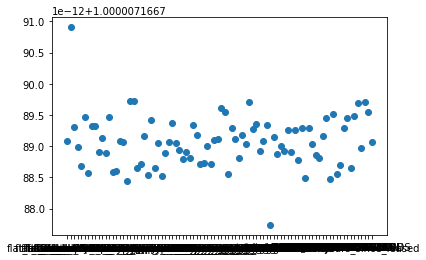

In [20]:
from sklearn.preprocessing import StandardScaler
X_transformed = pd.DataFrame(StandardScaler(with_mean=True).fit_transform(X), columns=X.columns)
X_transformed.head(10)

iks = plt.plot(X_transformed.std(axis=0), 'o')

plt . show()




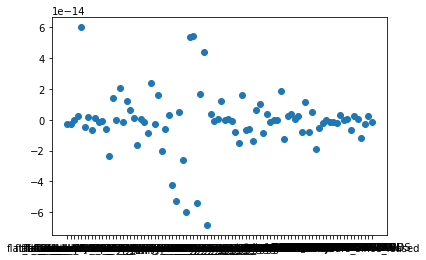

In [21]:
iks = plt.plot(X_transformed.mean(axis=0), 'o')

plt . show()


## Now all data have zero mean and unit std.

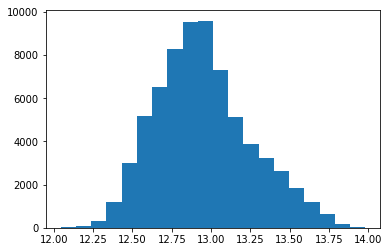

In [22]:
iks = plt.hist(y, 20);

plt . show()

In [23]:
X_transformed.std(axis=0)

floor_area_sqm                       1.000007
remaining_lease                      1.000007
block_fr                             1.000007
st_name_fr                           1.000007
years_since_leased                   1.000007
town:ANG MO KIO                      1.000007
town:BEDOK                           1.000007
town:BISHAN                          1.000007
town:BUKIT BATOK                     1.000007
town:BUKIT MERAH                     1.000007
town:BUKIT PANJANG                   1.000007
town:BUKIT TIMAH                     1.000007
town:CENTRAL AREA                    1.000007
town:CHOA CHU KANG                   1.000007
town:CLEMENTI                        1.000007
town:GEYLANG                         1.000007
town:HOUGANG                         1.000007
town:JURONG EAST                     1.000007
town:JURONG WEST                     1.000007
town:KALLANG/WHAMPOA                 1.000007
town:MARINE PARADE                   1.000007
town:PASIR RIS                    

In [24]:
X_transformed.mean(axis=0)

floor_area_sqm                       3.278318e-15
remaining_lease                     -5.998708e-16
block_fr                            -3.016741e-15
st_name_fr                           7.251737e-16
years_since_leased                  -1.686090e-15
town:ANG MO KIO                      1.843024e-14
town:BEDOK                          -1.241965e-14
town:BISHAN                          2.200317e-15
town:BUKIT BATOK                     3.641749e-15
town:BUKIT MERAH                     7.499563e-16
town:BUKIT PANJANG                   2.228677e-15
town:BUKIT TIMAH                    -7.814698e-15
town:CENTRAL AREA                    1.137554e-14
town:CHOA CHU KANG                  -7.980559e-15
town:CLEMENTI                        5.070270e-15
town:GEYLANG                        -1.871189e-14
town:HOUGANG                        -5.566935e-15
town:JURONG EAST                    -2.290277e-15
town:JURONG WEST                     1.294658e-16
town:KALLANG/WHAMPOA                -1.550734e-15


# Train a simple linear regression model.
- First, split data for testing. 

In [25]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split

## Divide the data into two categories:
- 67% to use in training
- 33% to test the model

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.33, random_state=42)
model = LR()
model.fit(X_train, y_train)
print (model.score(X_train, y_train), model.score(X_test, y_test))

0.886371478205 0.884004146773


## score = 1 is the perfect prediction. Here score = 0.88 is a satisfactory result!

In [27]:
X_test.head()

,floor_area_sqm,remaining_lease,block_fr,st_name_fr,years_since_leased,town:ANG MO KIO,town:BEDOK,town:BISHAN,town:BUKIT BATOK,town:BUKIT MERAH,...,month_of_sale:03,month_of_sale:04,month_of_sale:05,month_of_sale:06,month_of_sale:07,month_of_sale:08,month_of_sale:09,month_of_sale:10,month_of_sale:11,month_of_sale:12
41456,-0.561277,-0.445169,1.637378,2.762911,0.486070,-0.225465,3.940131,-0.140894,-0.201339,-0.199715,...,-0.327953,2.966962,-0.336755,-0.340541,-0.345474,-0.285995,-0.272818,-0.283613,-0.278357,-0.258375
54269,1.338057,-0.532817,0.488244,-0.941609,0.486070,-0.225465,-0.253799,-0.140894,4.966740,-0.199715,...,-0.327953,-0.337045,-0.336755,-0.340541,-0.345474,-0.285995,-0.272818,-0.283613,3.592509,-0.258375
4894,0.512260,1.132496,-1.037656,0.478305,-1.096437,-0.225465,-0.253799,-0.140894,-0.201339,-0.199715,...,-0.327953,2.966962,-0.336755,-0.340541,-0.345474,-0.285995,-0.272818,-0.283613,-0.278357,-0.258375
68740,0.553549,0.957200,-1.169524,1.274732,-1.008520,-0.225465,-0.253799,-0.140894,-0.201339,-0.199715,...,-0.327953,-0.337045,-0.336755,-0.340541,2.894572,-0.285995,-0.272818,-0.283613,-0.278357,-0.258375
29399,1.792245,0.606608,0.262185,0.332673,-0.656852,-0.225465,-0.253799,-0.140894,-0.201339,-0.199715,...,-0.327953,-0.337045,-0.336755,-0.340541,-0.345474,3.496566,-0.272818,-0.283613,-0.278357,-0.258375


In [28]:
model.intercept_


12.948605128737341

In [29]:
model.coef_

array([  1.64641546e-01,  -6.01982079e-04,   1.26399425e-02,
        -1.01328035e-02,  -1.01332263e-01,  -2.56859876e+10,
        -2.85450233e+10,  -1.65389529e+10,  -2.31644708e+10,
        -2.29919968e+10,  -2.23163467e+10,  -6.15652747e+09,
        -1.19817509e+10,  -2.46454446e+10,  -1.82023686e+10,
        -1.92444209e+10,  -2.60298984e+10,  -1.77941684e+10,
        -3.20399556e+10,  -2.08886625e+10,  -9.32612760e+09,
        -2.07406092e+10,  -2.70497055e+10,  -1.91988757e+10,
        -1.92696719e+10,  -3.10493415e+10,  -1.74937813e+10,
        -3.01551693e+10,  -2.12852614e+10,  -3.08989498e+10,
        -2.81009492e+10,   1.16709557e+10,   5.90901689e+10,
         2.54419461e+11,   2.86599189e+11,   2.49570940e+11,
         1.58553327e+11,   2.68940667e+11,   1.06111980e+11,
         1.16482566e+11,   1.13328947e+11,   1.08078803e+11,
         7.84887318e+10,   5.21473593e+10,   3.46629235e+10,
         2.95766926e+10,   2.15409550e+10,   1.77277053e+10,
         1.16590883e+10,

# We sort weights of the model to display highest weights. These heighest weights can be interpreted as the most important features

In [40]:
sorted(zip(X_transformed.columns, model.coef_), key = lambda x:-abs(x[1]))[:40]

[('flat_type:4 ROOM', 286599189155.26489),
 ('flat_type:MULTI-GENERATION', 268940666767.81485),
 ('flat_model:Multi Generation', -267858503122.13867),
 ('flat_type:3 ROOM', 254419461230.31491),
 ('flat_type:5 ROOM', 249570939877.1312),
 ('flat_model:Model A', -231283945683.41068),
 ('flat_model:Improved', -218732134718.73605),
 ('flat_model:New Generation', -183368550695.13602),
 ('flat_type:EXECUTIVE', 158553326804.43845),
 ('flat_model:Premium Apartment', -154455992228.64932),
 ('storey_range:04 TO 06', 116482566492.614),
 ('storey_range:07 TO 09', 113328946845.50658),
 ('storey_range:10 TO 12', 108078802711.82718),
 ('flat_model:Simplified', -106817599099.69998),
 ('storey_range:01 TO 03', 106111980263.95961),
 ('flat_model:Apartment', -99913666641.127258),
 ('flat_model:Standard', -86212074452.361359),
 ('flat_model:Maisonette', -84104802565.035965),
 ('storey_range:13 TO 15', 78488731786.835892),
 ('flat_model:Model A2', -61749099839.882561),
 ('flat_type:2 ROOM', 59090168878.3691

# Accordingly, most important features that are drivers of the prices of houses are:

- flat_type: highest groups are4 rooms and  MULTI-GENERATION
- flat_model

In [41]:
# lets have a look at the predicted offset

model.intercept_

12.948605128737341

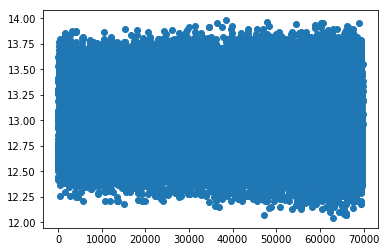

In [42]:
# and compare the predicted offset  with original offsets
iks = plt.plot(y, 'o')

plt . show()

In [43]:
np.dot(model.coef_, X_transformed.loc[0]) + model.intercept_

#This must be equal to predicted y_0

12.687130519362341

## Good agreement!

In [68]:
model.coef_.shape
X.loc[10].shape

(88,)

In [45]:
# predict prices of 10 first entries of the list

model.predict(X_transformed.loc[0:10])


array([ 12.68725259,  12.64623696,  12.66637857,  12.62975747,
        12.70275552,  12.71996743,  12.67602212,  12.67236001,
        12.66601236,  12.78063638,  12.69311196])

In [47]:
# original prices

y[:10]

0    12.449019
1    12.524526
2    12.560244
3    12.577636
4    12.577636
5    12.577636
6    12.577636
7    12.587928
8    12.611538
9    12.636230
Name: resale_price, dtype: float64

## Good agreement!

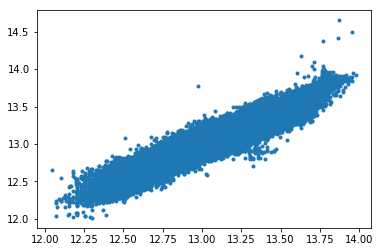

In [71]:
# Now lets compare predicted y values with original values

iks = plt.plot(y, model.predict(X_transformed), '.')

# This must be a line with slope 1

plt . show()

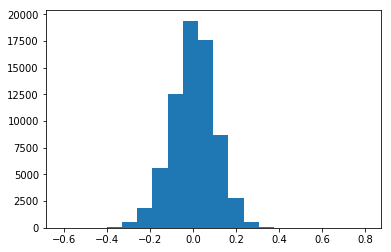

In [48]:
# Lets have a look at the distribution of the noise

iks = plt.hist(model.predict(X_transformed) - y, 20)

plt . show()

# Conclusion:
- Drivers of prices of houses according to this analysis are "flat type" and "flat model". This is not a trivial result! One may expect that location has a higher impact as turns out to be not very important.
- One may argue that since there are correlations between different features, as pointed out by the non-zero correlation coefficint $\rho$ in previous analysis, highest weights can not correspond to important features. A rather conservative approach would be to perform a principal axes analysis. However, our analysis gives a naive perspective about driving mechanisms of the housing prices.
